<a href="https://colab.research.google.com/github/MaLuisa7/Big_Data/blob/main/Tarea%201%3A%20Practica_1_Paralelismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  2


# Dask

Dask es un lenguaje en python que se beneficia de muchas de las librerias mas famosas que tiene, como numpy, pandas y scikit learn. 

Estas librerias sin ambargo, no estan diseñadas para la carga de trabajo que datos masivos tiene, ya que no se diseñaron para escalar datos.

In [ ]:
import numpy as np

#images = np.ones((10000, 1000, 1000))
#images

In [ ]:
import dask.array as da

images = da.ones((10000, 1000, 1000))
images

dask.array<ones_like, shape=(10000, 1000, 1000), dtype=float64, chunksize=(255, 255, 255), chunktype=numpy.ndarray>

In [ ]:
import dask.delayed as delayed
from dask.diagnostics import ProgressBar
import time

#Increment function: Suma 1 al valor inicial
def inc(i):
  return i + 1

#Dec function: Resta 1 al valor inicial
def dec(j):
  return j - 1

#Add function: Suma dos valores
def add(x, y):
  return x + y


In [ ]:
%%time

x = inc(1)
y = dec(2)
z = add(x, y)
z

CPU times: user 22 µs, sys: 4 µs, total: 26 µs
Wall time: 30.5 µs


3

In [ ]:
import random

def inc(i):
  time.sleep(random.random())
  return i + 1

def dec(j):
  time.sleep(random.random())
  return j - 1

def add(x, y):
  time.sleep(random.random())
  return x + y

In [ ]:
%%time

x = inc(1)
y = dec(2)
z = add(x, y)
z

CPU times: user 11.9 ms, sys: 1.63 ms, total: 13.5 ms
Wall time: 1.37 s


3

In [ ]:
import dask

@dask.delayed
def inc(i):
  time.sleep(random.random())
  return i + 1

@dask.delayed
def dec(j):
  time.sleep(random.random())
  return j - 1

@dask.delayed
def add(x, y):
  time.sleep(random.random())
  return x + y

In [ ]:
%%time

x = inc(1)
y = dec(2)
z = add(x, y)
z

CPU times: user 537 µs, sys: 0 ns, total: 537 µs
Wall time: 546 µs


Delayed('add-475e06fb-7d6c-4e94-800d-ebf20e4ce165')

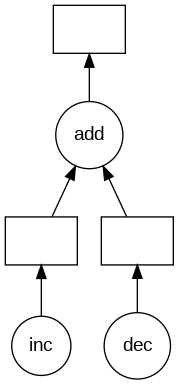

In [ ]:
z.visualize()

In [ ]:
z.compute()

3

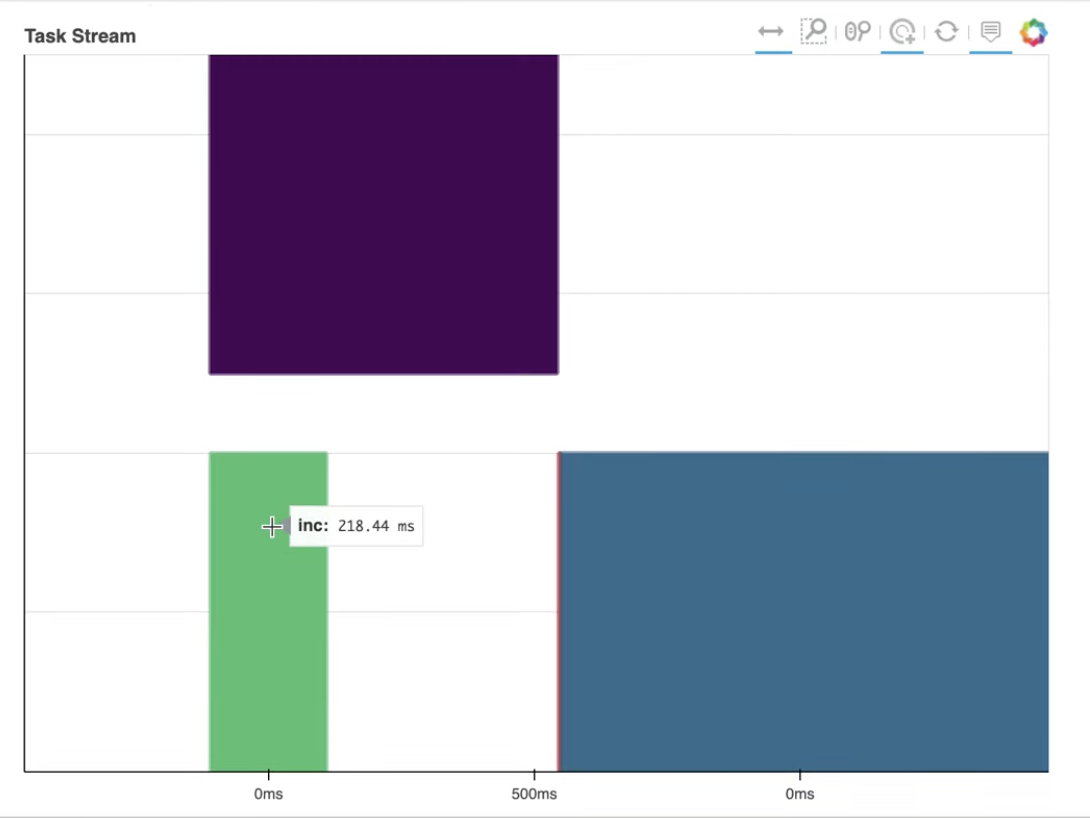

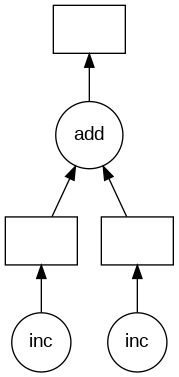

In [ ]:
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)
z.visualize()

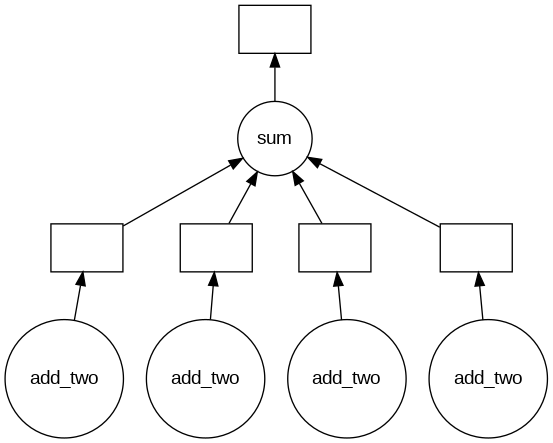

In [ ]:
#Add two function: Le suma 2 al valor inicial
def add_two(x):
  return x + 2

#sum two numbers: Similar a add, sumamos dos valores iniciales
def sum_two_numbers(x,y):
  return x + y

#Multiply four: El valor se multiplica por 4
def multiply_four(x):
  return x * 4


#Dummy dataframe
data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
total = delayed(sum)(step1)
total.visualize()

In [ ]:
total.compute()

32

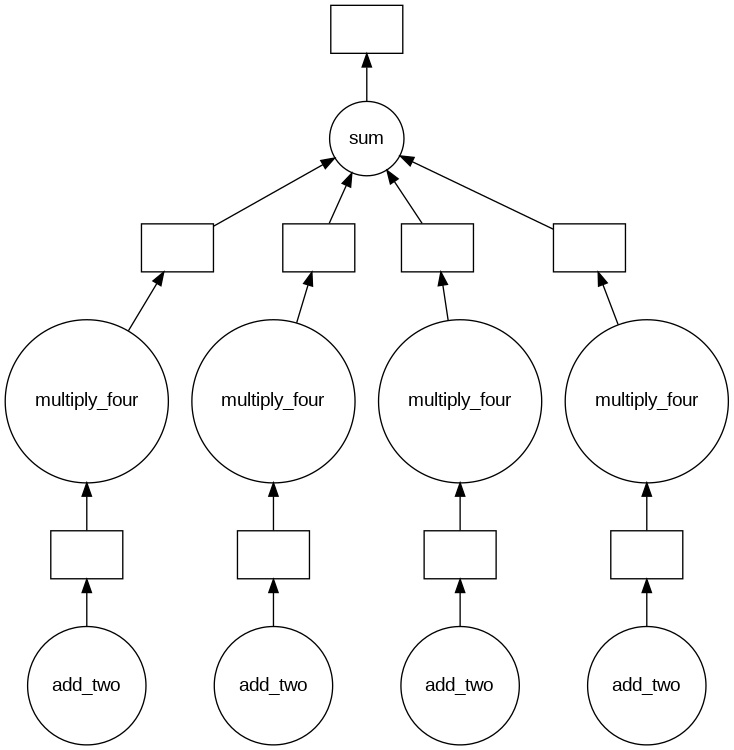

In [ ]:
step1 = [delayed(add_two)(i) for i in data]
step2 = [delayed(multiply_four)(j) for j in step1]
total = delayed(sum)(step2)
total.visualize()

In [ ]:
total.compute()

128

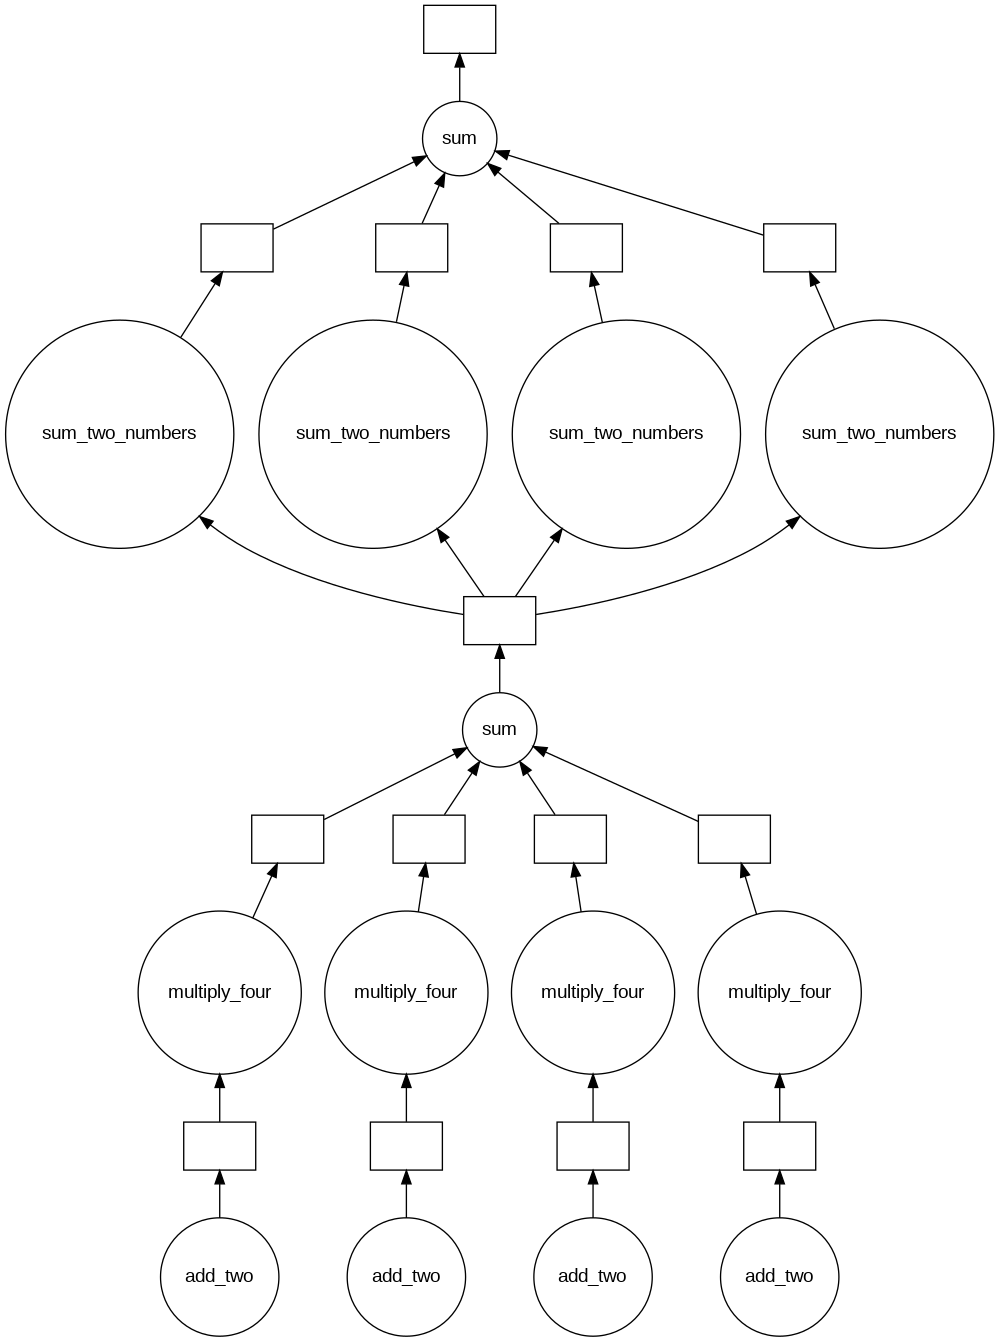

In [ ]:
data2 = [delayed(sum_two_numbers)(k, total) for k in data]
total2 = delayed(sum)(data2)
total2.visualize()

In [ ]:
total2.compute()

536

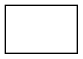

In [ ]:
total_persisted = total.persist()
total_persisted.visualize()

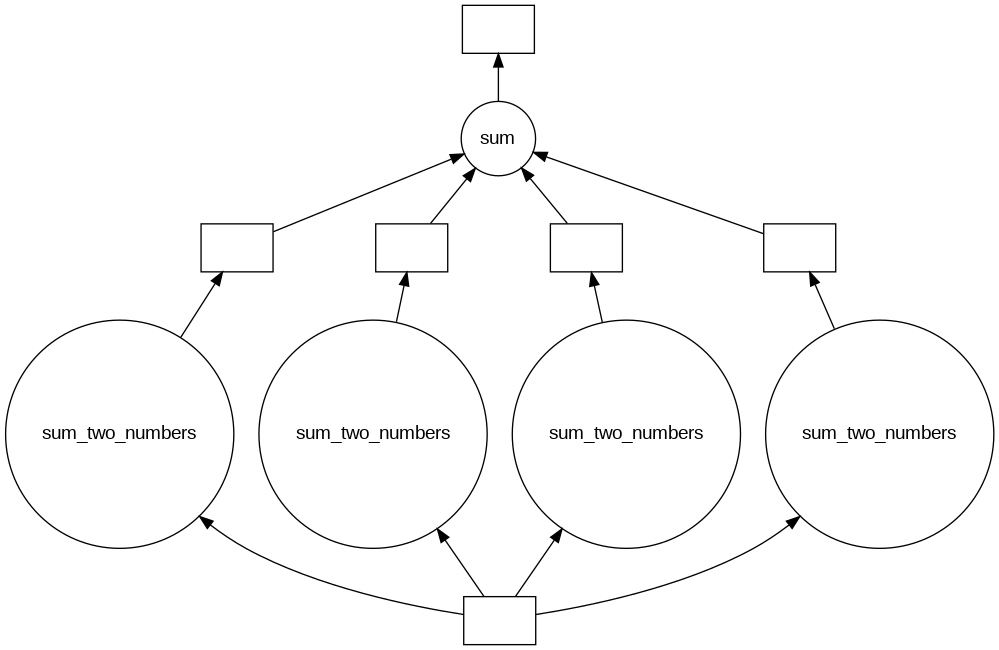

In [ ]:
data2 = [delayed(sum_two_numbers)(l, total_persisted) for l in data]
total2 = delayed(sum)(data2)
total2.visualize()

# Practica 1: Paralelizacion.

Parte 1: Investigar sobre las lazy variables y como se usa el Delay para problemas mas grandes.

Parte 2: Generen varias funciones y construyan un grafo de paralelización con al menos 4 cuellos de botella.


Extra challenge: Buscar ensemble learning en Scikit learn, utilizar minimo 3 algoritmos de machine learning para crear un modelo paralelo basado en un ensamble. Generar uno con dask y otro con la libreria de ensemble de sklearn, y comparar resultados. 

## Parte 1


La evaluación perezosa brinda herramientas que permite programar criterios que no son posibles con una evaluación normal. 

La evaluación perezosa también permite que los programas manejen estructuras de datos aparentemente infinitas.Esto es posible ya que solo es necesario crear aquellos valores de la estructura de datos aparentemente infinita que se vayan a utilizan.

La inicialización perezosa es la técnica de retrasar la creación de un objeto que implica un proceso y se busca retrasar ese proceso hasta que sea necesario.

En python, los iteradores y generadores presentan una gran ventaja sobre las funciones ya que son más eficientes y menos pesados en memoria.

Las lazy variables son variables almacenadas que su inicialización se retrasa y cuyo valor inicial se calcula solo una vez.

Para agregar tiempo de retardo en los programas en python se utiliza la función "sleep()", la cual es una función que ya viene integrada en python.
Los tiempos de retardo se utilizan para agregar retardos en el tiempo de ejecución en el código del programa.

Python tiene varias maneras de emplear tiempos de retardo, los cuales son:
* time.sleep()
* threading.Event.wait 
* threading.Timer
* time.monotonic()

La más común es time.sleep().





## Parte 2


In [1]:
import dask.delayed as delayed
from dask.diagnostics import ProgressBar
import time
import pandas as pd 

In [2]:
import dask

In [3]:
#leer fuentes de datos

#Datos de google

def google(path):
  data_google= pd.read_csv(path)
  return data_google

#Datos de google
def scrapper(path):
  data_scrapper= pd.read_csv(path)
  return data_scrapper

#Datos de google
def clima(path):
  data_clima= pd.read_csv(path)
  return data_clima

#Datos de google
def nielsen(path):
  data_nielsen= pd.read_csv(path)
  return data_nielsen

#datos completos
def consolidacion_datos(dataGoogle, dataScrapper, dataClima,dataNielsen):
  df = pd.concat([dataGoogle, dataScrapper, dataClima,dataNielsen], axis =0)
  return df

#prediccion de variables independientes
def prediccion_x(datos_completos):
  df_ma = datos_completos.rolling(window=30).mean()
  return df_ma

#prediccion de variable dependiente
def prediccion_y(datos_independientes_ma):
  df_y = datos_independientes_ma.sum(axis=1)
  return df_y

In [4]:
path_google = "/content/Estadisticas NBA.xlsx"
path_scrapper = "/content/batting_2000.csv"
path_clima = "/content/batting_2000.csv"
path_nielsen = "/content/Estadisticas NBA.xlsx"

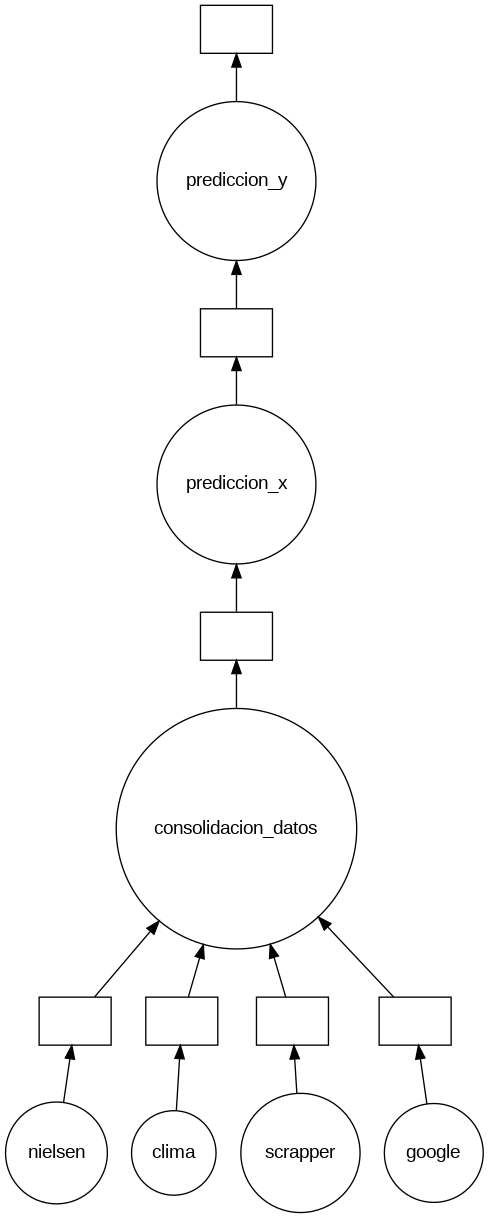

In [5]:
df_google = delayed(google)(path_google)
df_scrapper = delayed(scrapper)(path_scrapper)
df_clima = delayed(clima)(path_clima)
df_nielsen = delayed(nielsen)(path_nielsen)
data_consolidada = delayed(consolidacion_datos)(df_google,df_scrapper,df_clima,df_nielsen)
prediccion_independientes = delayed(prediccion_x)(data_consolidada)
prediccion_dependiente = delayed(prediccion_y)(prediccion_independientes)
prediccion_dependiente.visualize()

## Extra bonus exercise



In [38]:
# !pip install dask_ml
# !pip install sklearn
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
import numpy as np
from dask_ml.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.externals.joblib import parallel_backend
import sklearn.datasets
import sklearn 
from dask.distributed import Client

### Modelo con dask

In [42]:

client = Client()
data= sklearn.datasets.load_diabetes()
X = pd.DataFrame(data.data)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model1 = RandomForestRegressor(verbose=1)
model2 = KNeighborsRegressor()
model3 = LinearRegression()

with parallel_backend('dask'):
 model1.fit(X_train,y_train)
 predictions_1 = model1.predict(X_test)
 model2.fit(X_train,y_train)
 predictions_2 = model2.predict(X_test)
 model3.fit(X_train,y_train)
 predictions_3 = model3.predict(X_test)
 pred_final = np.average([predictions_1,predictions_2,predictions_3], axis=0)
 
pred_final


/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41173 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:40557
INFO:distributed.scheduler:  dashboard at:           127.0.0.1:41173
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43577'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34373'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:38081', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38081
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:58554
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42167', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker comp

array([125.44323497, 216.10677005, 106.3387933 , 271.20883086,
       118.16702635, 215.84496486,  85.94638398, 108.53078726,
        80.21194826,  82.59845471, 142.42665278, 172.90478939,
        85.04571269, 220.90435698, 208.22309354, 128.20260221,
        64.20674687, 236.39511293, 156.4776828 , 151.23271993,
       186.41976284, 202.51272772, 269.90963881, 105.70208025,
       223.7786709 , 223.69569525, 116.2658382 , 151.42167863,
       187.1406823 ,  81.95839492, 101.5026567 , 226.41022418,
        89.60107126,  69.77923941, 168.68017718, 139.2409988 ,
        87.40231269, 143.53825757,  71.48513363, 114.55212288,
       127.59041847,  73.19226938, 139.76040674, 240.55162493,
       206.54585381, 147.5686865 ,  99.72215522, 160.14454119,
       243.8494317 , 154.44042213, 214.94938967,  68.81581425,
       119.70174887, 184.92286642, 229.86971171, 117.61138156,
       137.133608  , 107.02071851, 158.93052611, 114.7957776 ,
       104.89033883, 261.56305271,  81.65254036, 179.78

### Modelo con sklearn ensemble

In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [80]:

# load dataset
iris = fetch_openml('iris', version=1, as_frame=True)
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)
le = LabelEncoder()
y= pd.Series(le.fit_transform(y )) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
estimators=[('knn', knn), ('rf', rf), ('log_reg', log_reg)]#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)

Tanto dask como ensemble de sklearn dieron buenos resultados. Sin embargo, la libreria de dask nos brinda más información acerca de los trabajos en paralelo que la de sklearn ya que esta última itera en los modelos y nos regresa la votación de los resultados.